# Health Insurance Analysis 

In this project, we attempt to analyze and explore a dataset for medical costs in Health Insurance in USA in order to derive valuable insights, and find answers to questions through statistical hypothesis testing.

# 1. Importing the Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 2. Loading the Data:

In [5]:
data = pd.read_csv(r"D:\DataAnalysisProjects\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Exploratory Data Analysis:

# 3.1 Shape:

In [6]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')

Shape of the data: (1338, 7)
There are 1338 rows in the data.


# 3.2 Data Types:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# What are the different datatypes present in the data?
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
# Let's checkout individual columns:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Transform the Index object to a series, and grouping by data types:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [13]:
# let's create a dictionary containing various datatypes (Integer, Float and object) and the columns that have this datatype:
dt = {k.name: v for k, v in g.items()}
# Display the columns by different datatypes:
attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

,Attr 1,Attr 2,Attr 3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


In [14]:
# Unique values for 'children':
sorted(data['children'].unique())

[0, 1, 2, 3, 4, 5]

# 3.3. Data Cleaning:

In [15]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

# 3.4. Summary and Distribution of numerical attributes:

In [16]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [18]:
# Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:
def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    
    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')
    
    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')   

# 3.4.1. Age Distribution:

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


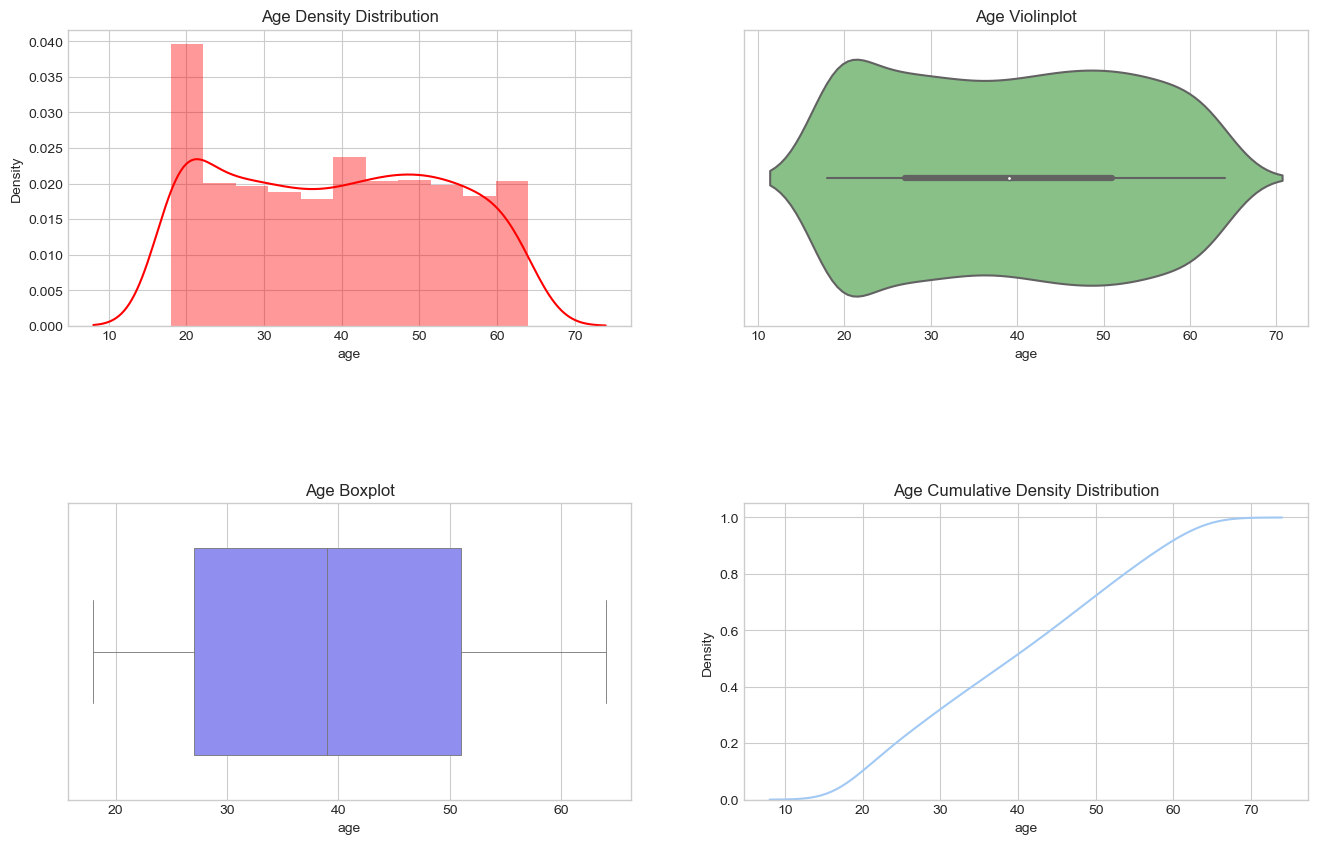

In [19]:
summary('age')

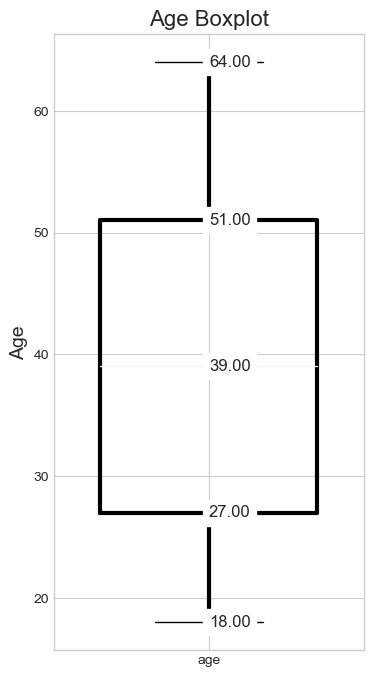

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [20]:
box_plot('age')

# Observations:

In [21]:
# How many of the insured have the age of 64?  
df = data[data['age'] == data['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


# 3.4.2. BMI Distribution:

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


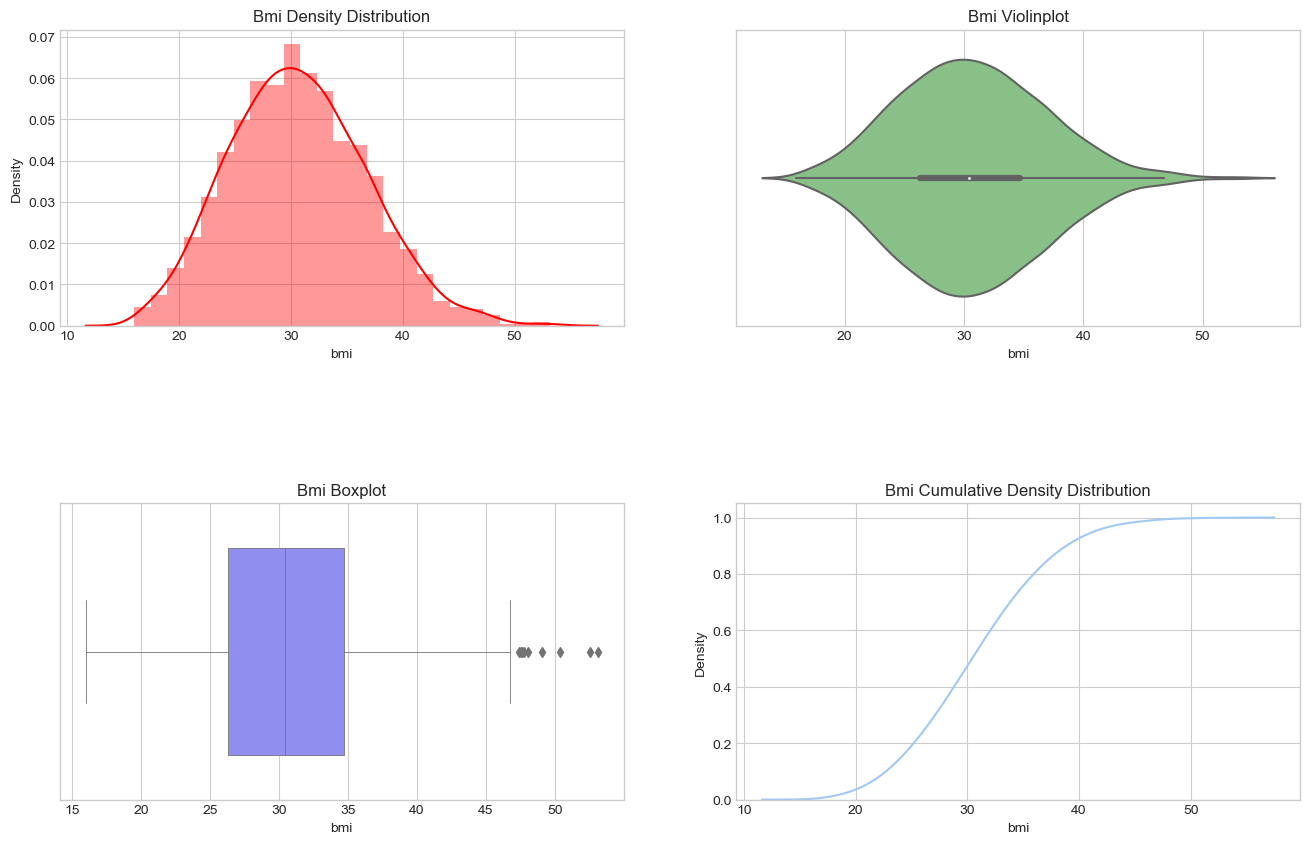

In [22]:
summary('bmi')

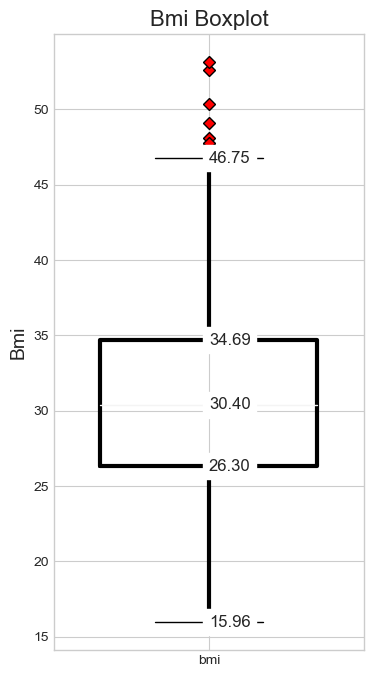

Mean Bmi = 30.66339686098655
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [23]:
box_plot('bmi')

In [24]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [25]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

# Observations:

# 3.4.3. Charges Distribution:

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


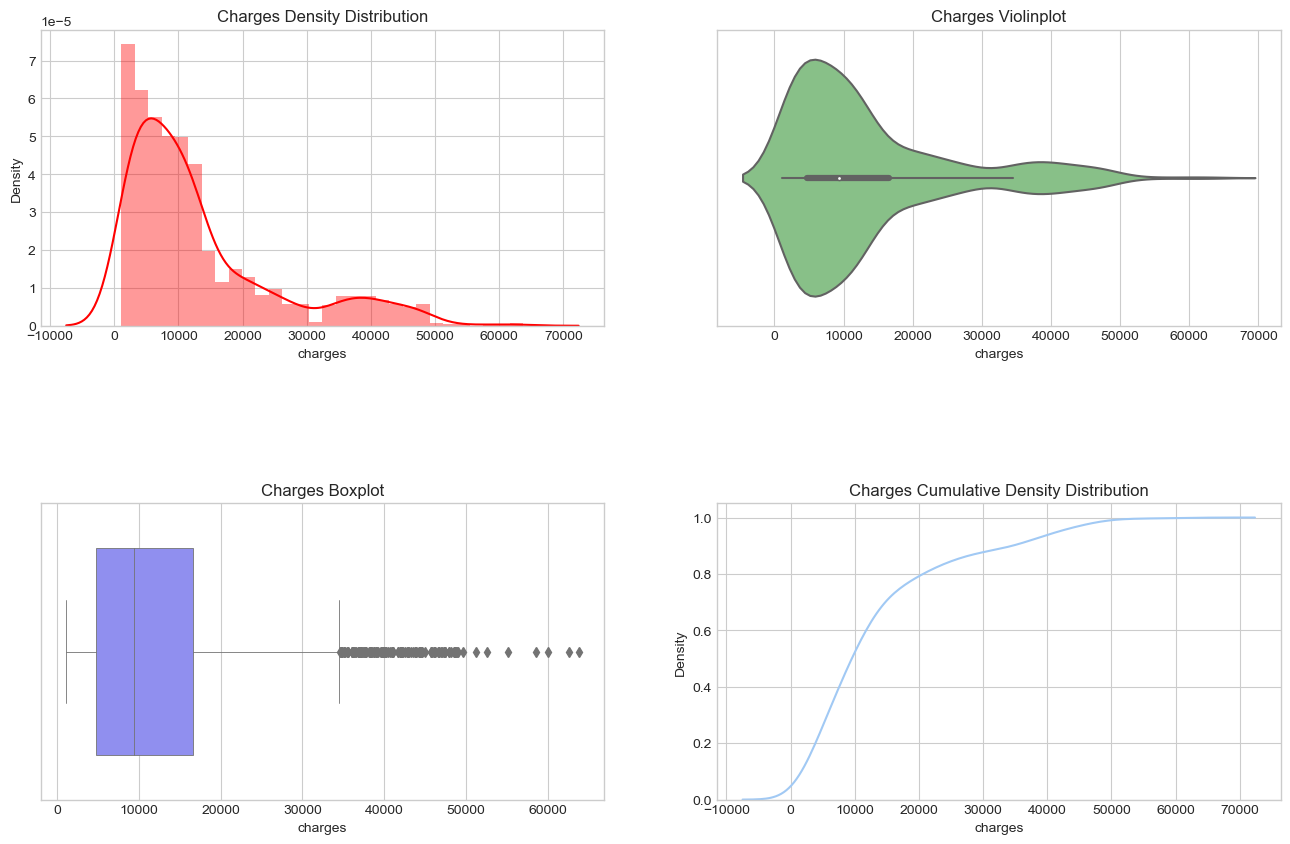

In [26]:
summary('charges')

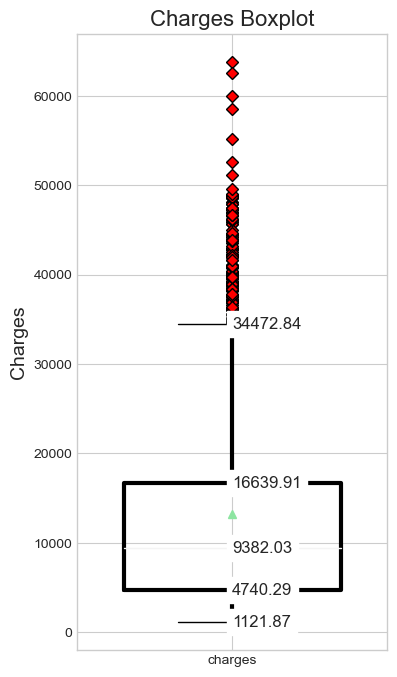

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [27]:
box_plot('charges')

In [28]:
# Who is paying the highest charges?
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [29]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [30]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

# Observations:

# 3.5. Summary and Distribution of categorical attributes:

In [31]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()


# 3.5.1 Sex:

<Axes: xlabel='sex', ylabel='count'>

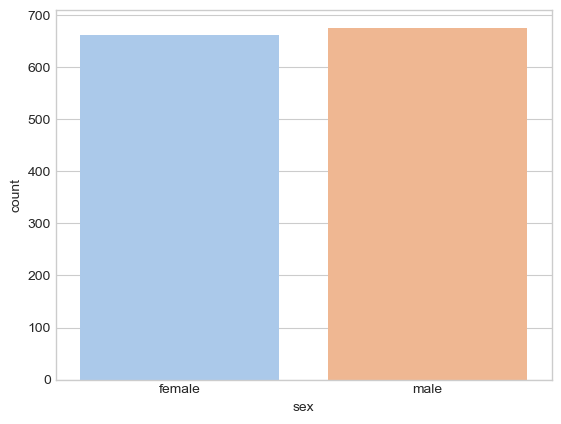

In [32]:
sns.countplot(x = 'sex', data = data)

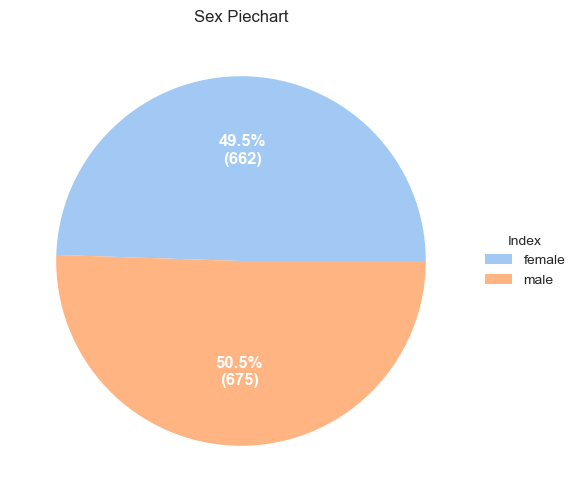

In [33]:
pie_chart('sex')

# Observation:

# 3.5.2. Smoker

<Axes: xlabel='smoker', ylabel='count'>

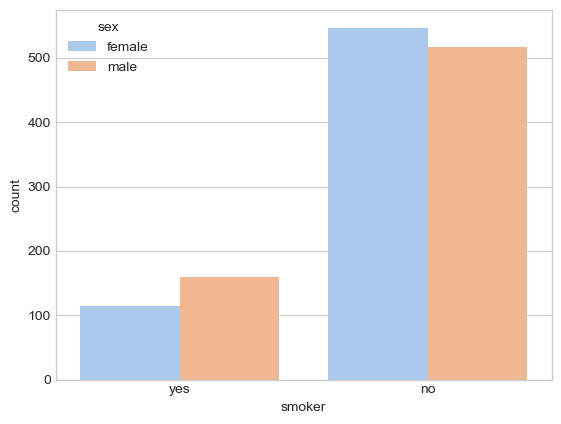

In [34]:
sns.countplot(x = 'smoker', hue = 'sex', data = data)

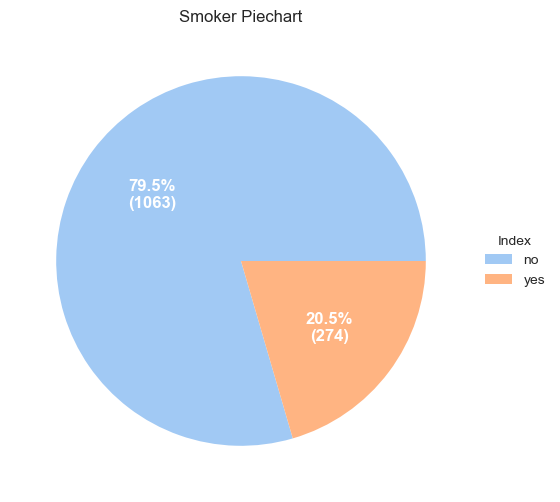

In [35]:
pie_chart('smoker')

In [36]:
# Are average premium charges for smokers significantly higher than non-smokers?
data['charges'].groupby(data['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [37]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<Axes: xlabel='smoker', ylabel='charges'>

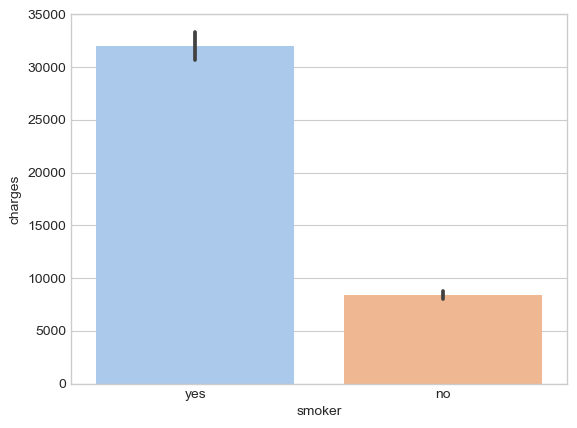

In [38]:
# yes, average premium charges for smokers are indeed significantly higher than non-smokers.
sns.barplot(x = "smoker", y = "charges", data = data)

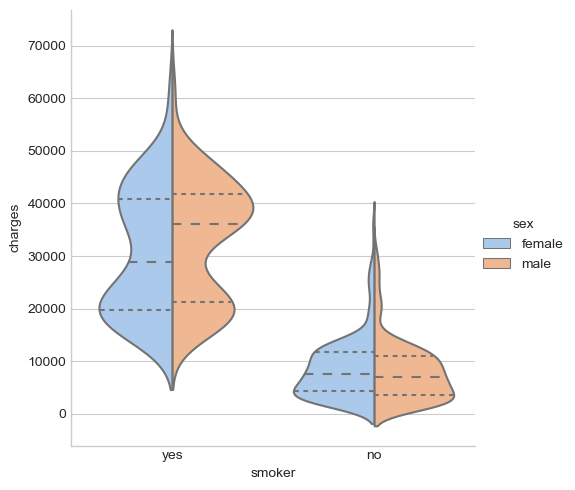

In [39]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data);

In [40]:
data.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

# Observations:

# 3.5.3. Regions

<Axes: xlabel='region', ylabel='count'>

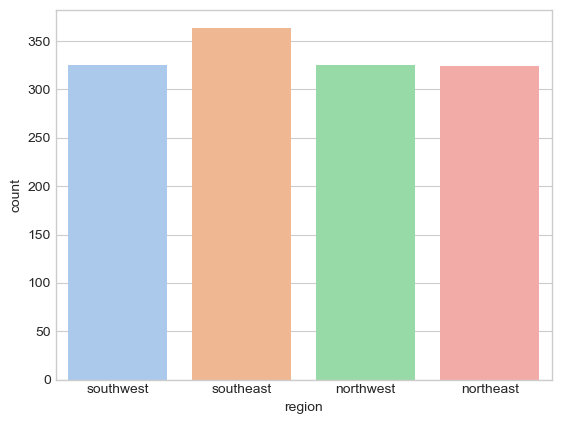

In [42]:
sns.countplot(x = 'region', data = data)

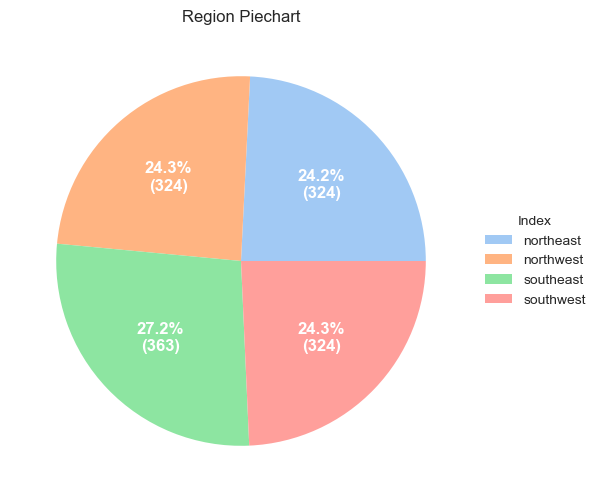

In [43]:
pie_chart('region')

# Observation:

# 3.5.4. Number of Children

<Axes: xlabel='children', ylabel='count'>

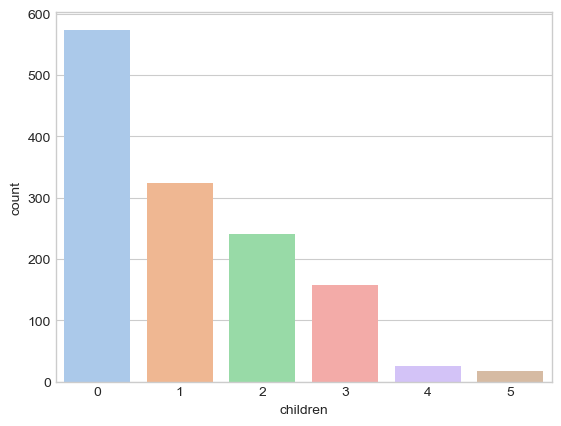

In [44]:
sns.countplot(x = 'children', data = data)

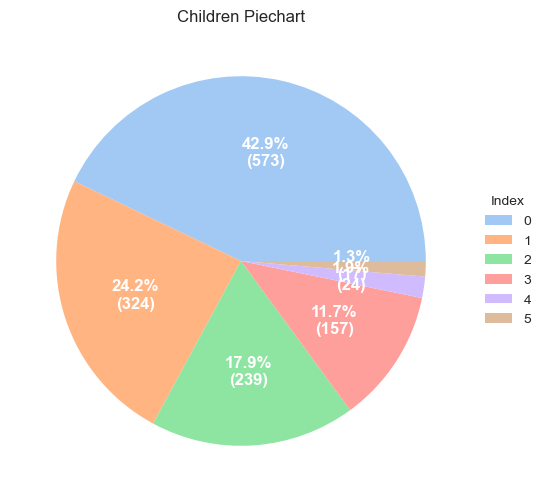

In [45]:
pie_chart('children')

In [46]:
data.groupby(['children']).agg('count')['age']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

# Observation:

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.6. Pairplot:

In [48]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes 

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [49]:
type(data.dtypes)

pandas.core.series.Series

In [50]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [51]:
# Finally, we transform the original columns by replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


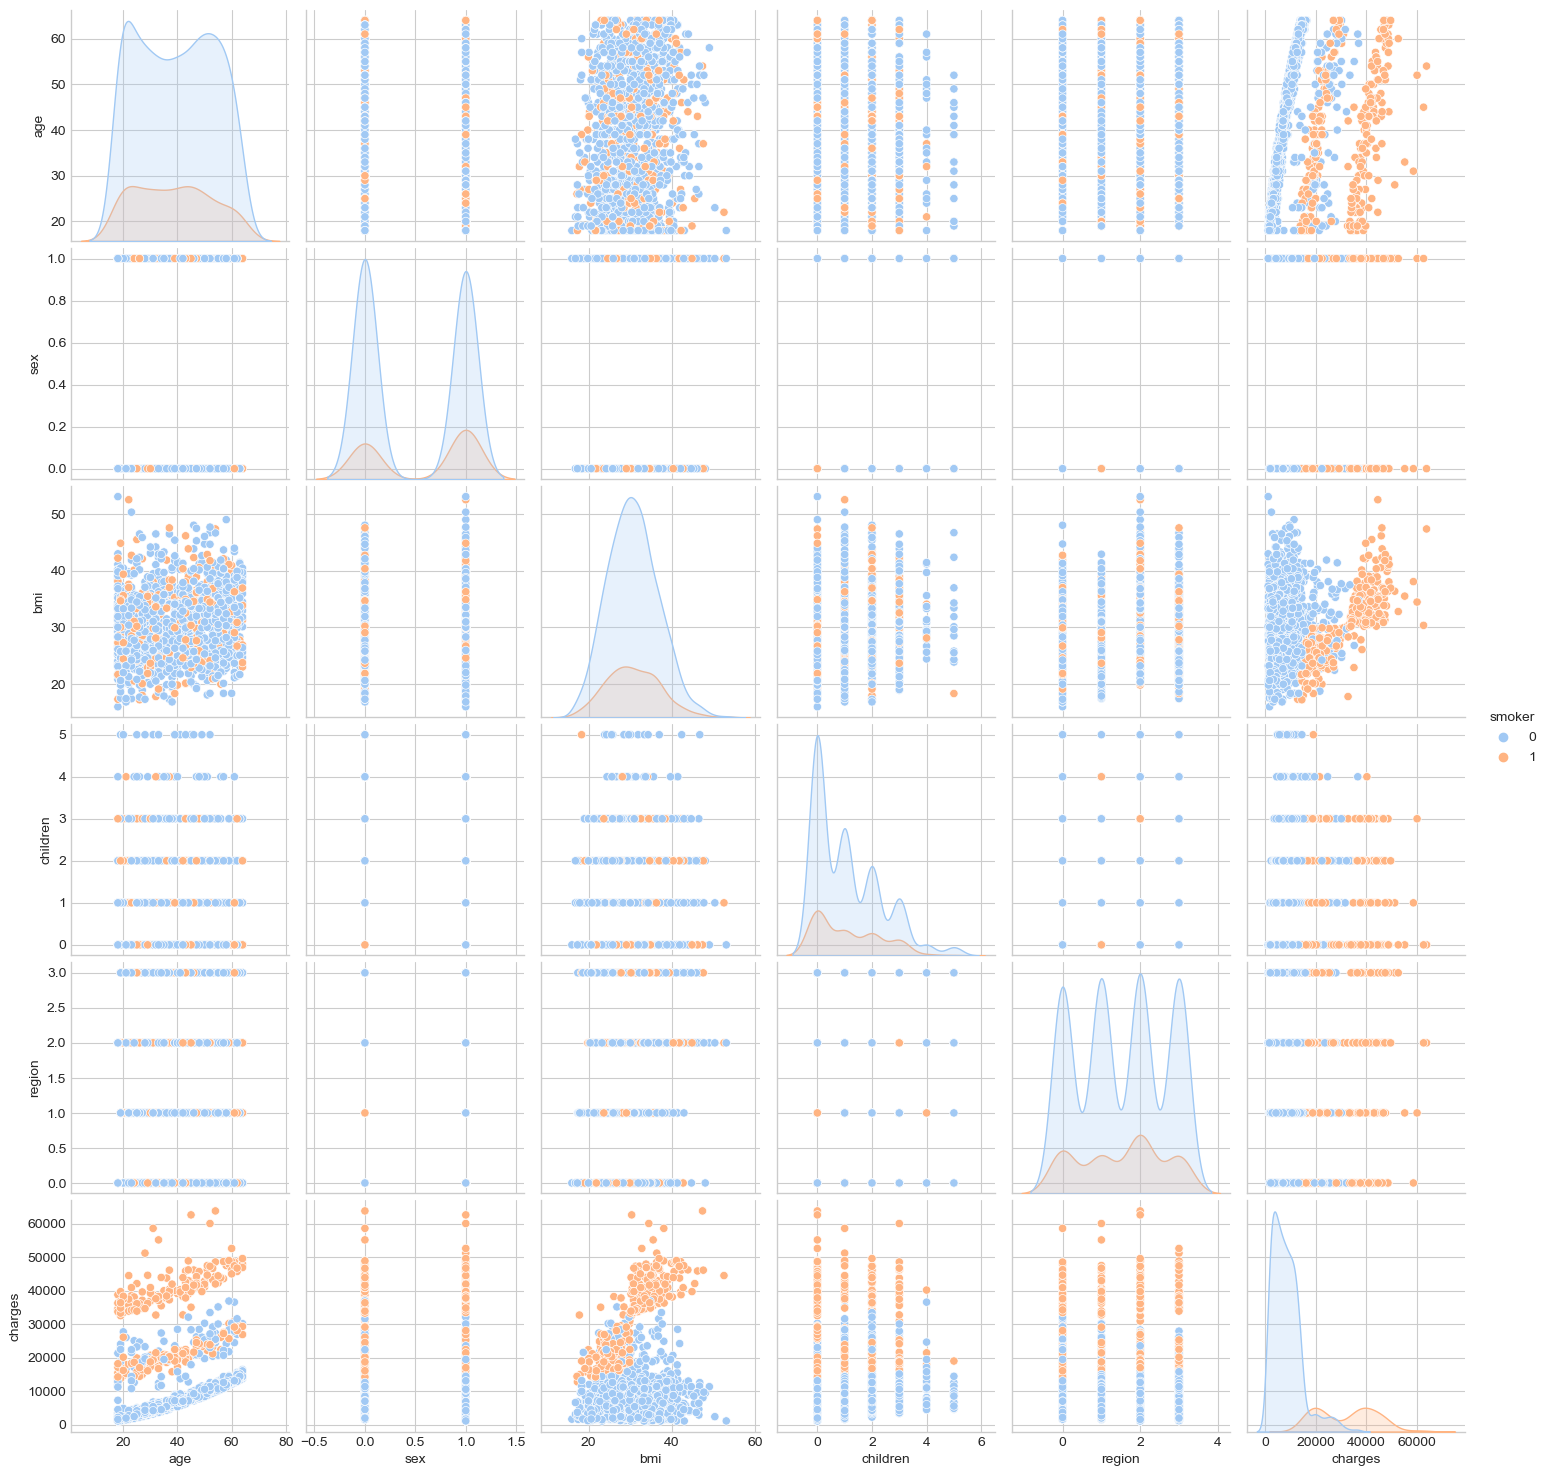

In [52]:
# Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(data, hue  = 'smoker')

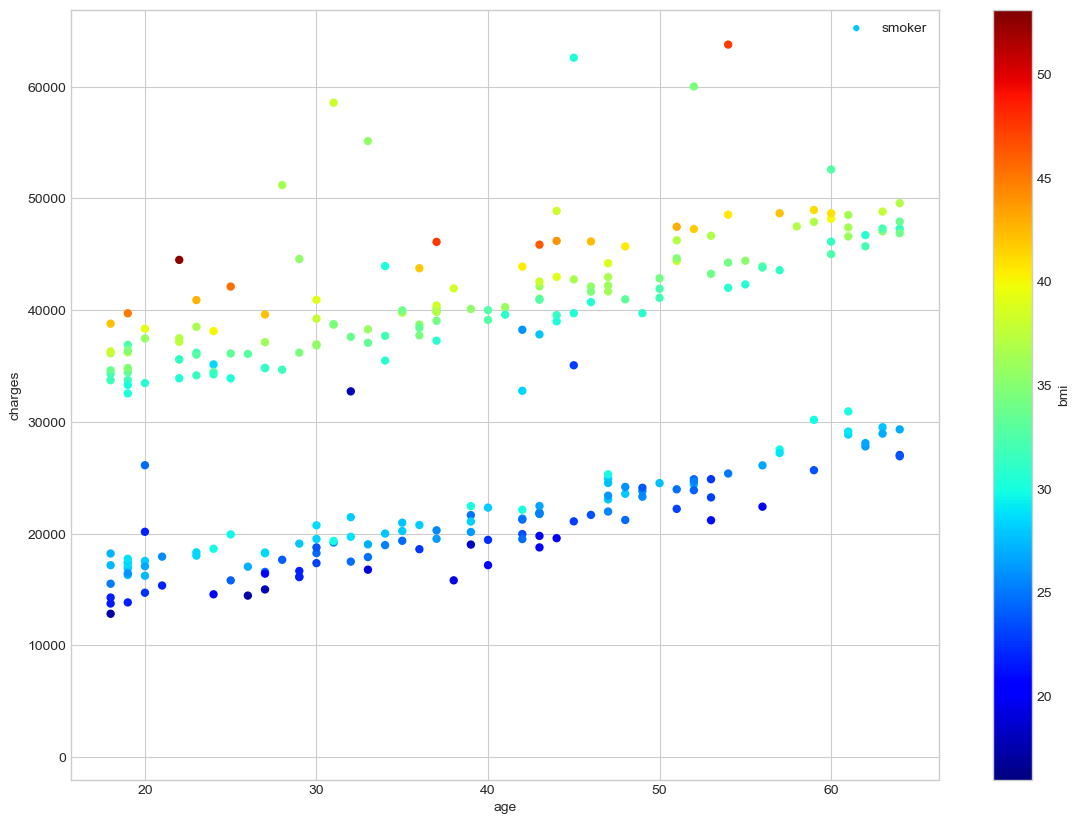

In [53]:
data.plot(kind="scatter", x="age", y="charges", 
    s=data["smoker"]*25, label="smoker", figsize=(14,10),
    c='bmi', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# 3.7. Correlation:

<Axes: >

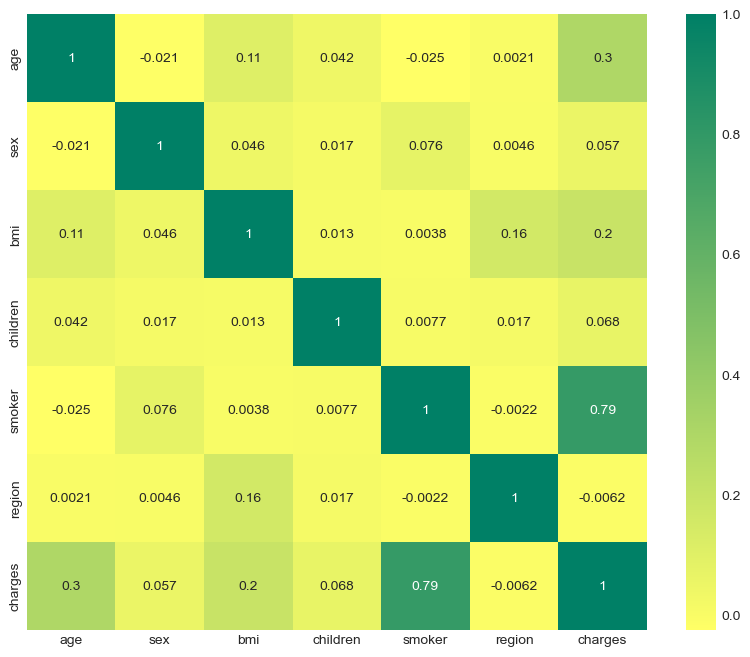

In [54]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

# Observation:

# 4. Hypothesis Testing:

# 4.1 Do charges of people who smoke differ significantly from the people who don't?

# Collect data and calculate the value of test statistic

In [55]:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 1064
Variance in charges of smokers: 35891656.00316425
Number of non - smokers: 274
Variance in charges of non - smokers: 132721153.13625304


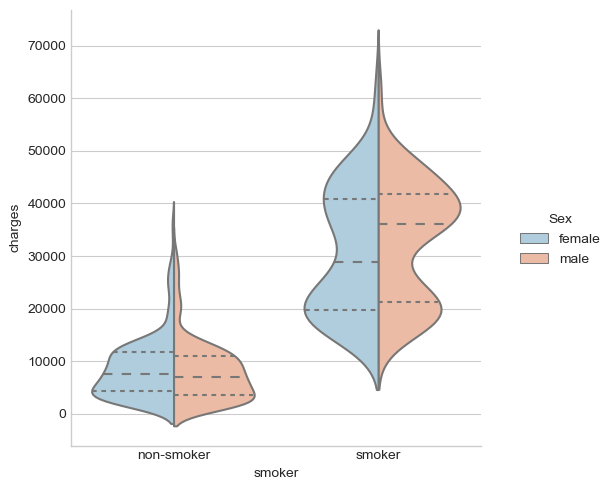

In [56]:
#Visualizing the collected data:
g = sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="RdBu_r", data=data, legend_out = True);

xlabels = ['non-smoker', 'smoker']
g.set_xticklabels(xlabels)

new_title = 'Sex'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['female', 'male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


In [57]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


# Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [58]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 5.88946444671698e-103


# Compare the probability associated with the test statistic with level of significance specified

In [60]:
p_value > 0.05

False

# Conclusion:

# 4.2. Does BMI of males differ significantly from that of females?

# Collect data and calculate the value of test statistic

In [61]:
males = data[data['sex'] == 1]
females = data[data['sex'] == 0]
bmi_males = males['bmi']
bmi_females = females['bmi']

print(f'Number of males: {males.shape[0]}')
print(f'Variance in BMI of males: {np.var(bmi_males)}')
print(f'Number of females: {females.shape[0]}')
print(f'Variance in BMI of females: {np.var(bmi_females)}')

Number of males: 676
Variance in BMI of males: 37.6491607363954
Number of females: 662
Variance in BMI of females: 36.49917703379856


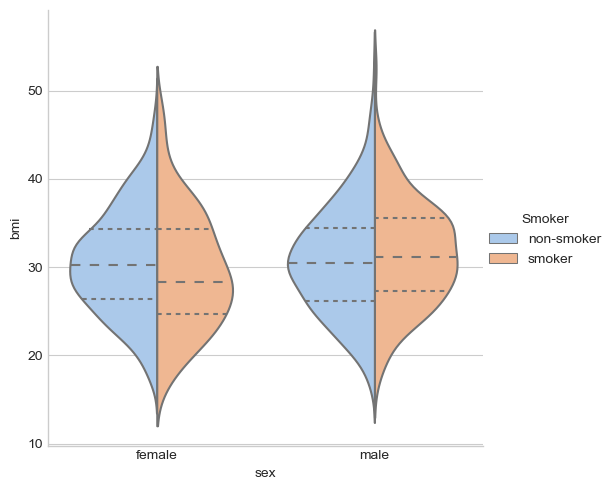

In [63]:
#Visualizing the collected data:
g = sns.catplot(x="sex", y="bmi", hue="smoker",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data, legend_out = True);

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)

new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [64]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_males, bmi_females, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


# Compare the probability associated with the test statistic with level of significance specified

In [65]:
p_value > 0.05

True

# 4.3. Is the proportion of smokers significantly different in different genders?

# Collect data and calculate the value of test statistic

In [68]:
n_females = data['sex'].value_counts()[0] # number of females in the data
n_males = data['sex'].value_counts()[1] # number of females in the data

female_smokers = data[data['sex'] == 0].smoker.value_counts()[1] # number of female smokers
male_smokers = data[data['sex'] == 1].smoker.value_counts()[1] # number of male smokers

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 17.37%, 23.52% respectively.


[Text(0, 0, 'female'), Text(0, 1, 'male')]

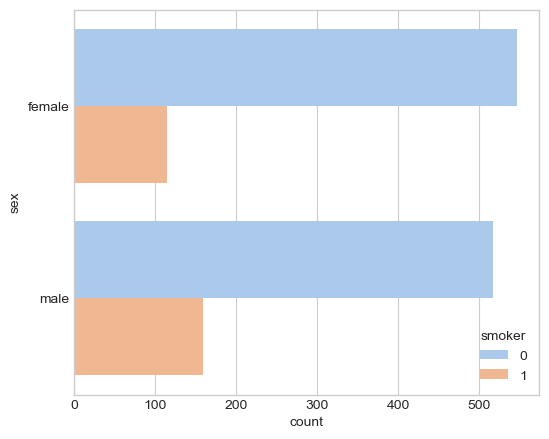

In [69]:
# Visualization of the collected data:
plt.figure(figsize=(6,5))
chart = sns.countplot(y = 'sex', hue = 'smoker', data = data)
chart.set_yticklabels(['female', 'male'])

In [70]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: -2.7867402154855503
p_value: 0.005324114164320532


# Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [71]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {pval} the difference is not significant. We fail to reject the Null Hypothesis')

With a p-value of 0.005324114164320532 the difference is significant. We reject the Null Hypothesis.


# 4.4. Is the distribution of bmi across women with no children, one child and two children, the same?

# Analysis of variance (ANOVA)

# Assumptions of ANOVA

In [ ]:
All populations involved follow a normal distribution
All populations have the same variance
The samples are randomly selected and independent of one another

# Collect data and calculate the value of test statistic

In [72]:
df = data[data['children'] <= 2]
female = df[df['sex'] == 0]
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
9,60,0,25.84,0,0,1,28923.13692
11,62,0,26.29,0,1,2,27808.72510


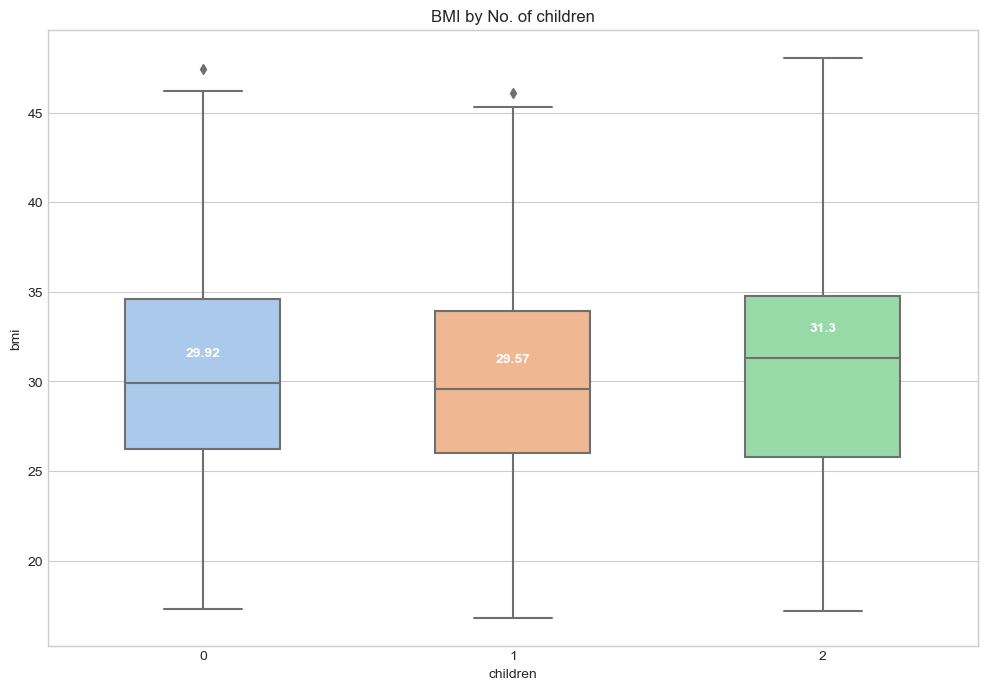

In [73]:
# Visualizing the collected data:
fig = plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = female, width = 0.5)

medians = female.groupby(['children'])['bmi'].median().round(2)
vertical_offset = female['bmi'].median() * 0.05 # offset from median for display

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')


plt.title('BMI by No. of children')
plt.show()

# Calculate p value using ANOVA table

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


# Conclusion:

# Determine which mean(s) is / are different

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female['bmi'], female['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8641 -1.7185 1.1008  False
     0      2   0.2883 0.9003 -1.2636 1.8401  False
     1      2   0.5971 0.6961 -1.1322 2.3265  False
---------------------------------------------------
